Bitcoin Price Analysis 

In [ ]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/63.2 kB ? eta -:--:--

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 kB 904.6 kB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/112.2 kB ? eta -:--:--

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━ 102.4/112.2 kB 51.1 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 1.2 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/114.8 kB ? eta -:--:--

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.8/114.8 kB 1.3 MB/s eta 0:00:00


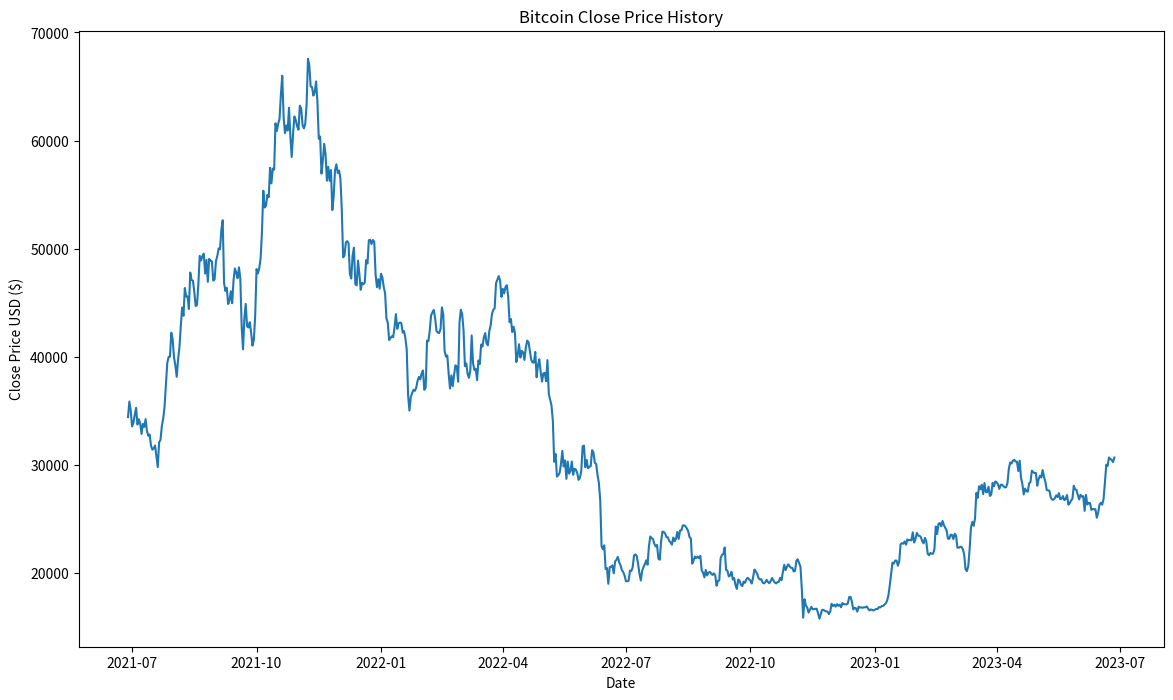

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta

# Define the ticker symbol
tickerSymbol = 'BTC-USD'

# Get data for this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker
endDate = datetime.today().strftime('%Y-%m-%d')
startDate = (datetime.today() - timedelta(days=365*2)).strftime('%Y-%m-%d')
tickerDf = tickerData.history(period='1d', start=startDate, end=endDate)

# Plot the close prices
plt.figure(figsize=(14,8))
plt.plot(tickerDf['Close'])
plt.title('Bitcoin Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.show()

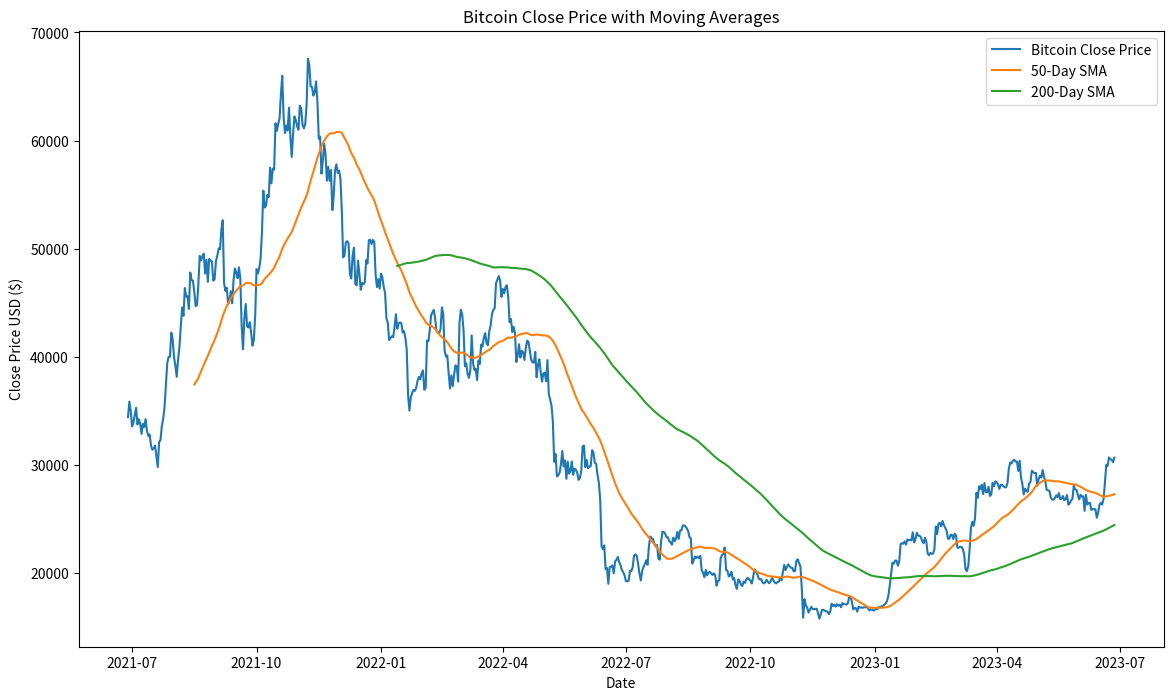

In [ ]:
# Calculate the 50-day Simple Moving Average
tickerDf['SMA_50'] = tickerDf['Close'].rolling(window=50).mean()

# Calculate the 200-day Simple Moving Average
tickerDf['SMA_200'] = tickerDf['Close'].rolling(window=200).mean()

# Plot the close prices with the moving averages
plt.figure(figsize=(14,8))
plt.plot(tickerDf['Close'], label='Bitcoin Close Price')
plt.plot(tickerDf['SMA_50'], label='50-Day SMA')
plt.plot(tickerDf['SMA_200'], label='200-Day SMA')
plt.title('Bitcoin Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend()
plt.show()

Split the data into training and testing sets:

In [ ]:
from sklearn.model_selection import train_test_split

# Extract the features and target variable
features = tickerDf[['SMA_50', 'SMA_200']]
target = tickerDf['Close']

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


That's a model that can handle missing values natively, such as HistGradientBoostingRegressor from scikit-learn:

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

# Create an instance of HistGradientBoostingRegressor
model = HistGradientBoostingRegressor()

# Train the model on the training data
model.fit(X_train, y_train)



HistGradientBoostingRegressor() In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. HistGradientBoostingRegressor HistGradientBoostingRegressor()

In [ ]:
# Make predictions on the testing data
predictions = model.predict(X_test)


Evaluate the model's performance:

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate the R-squared score
r2 = r2_score(y_test, predictions)

print('Mean Squared Error (MSE):', mse)
print('R-squared score:', r2)


Mean Squared Error (MSE): 9938262.503230104
R-squared score: 0.9389202492405353


To predict future price progress, you can use the trained model to make predictions on new data points. Here's an example using the last available data point in the dataset:

In [ ]:
import numpy as np

# Get the last available data point
last_data_point = np.array(tickerDf[['SMA_50', 'SMA_200']].tail(1))

# Make a prediction on the last data point
future_price = model.predict(last_data_point)

print('Predicted future price:', future_price)


Predicted future price: [29847.52292369]


Predicted future price: 29847.52292369

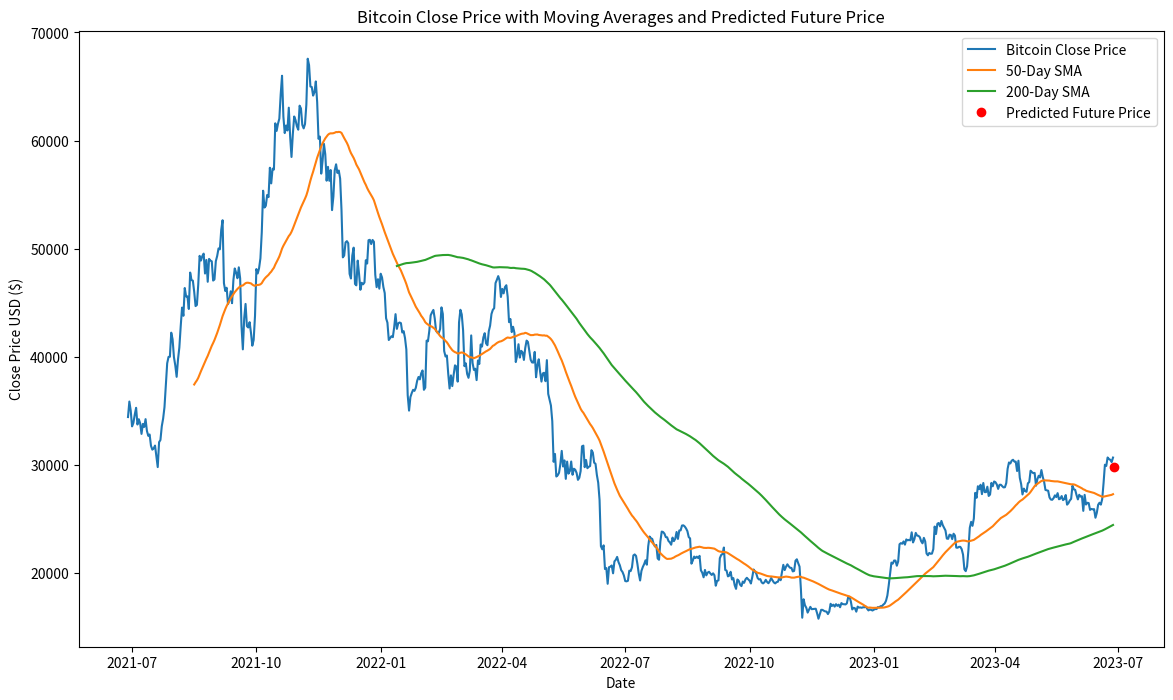

In [ ]:
import matplotlib.pyplot as plt

# Plot the close prices with the moving averages
plt.figure(figsize=(14, 8))
plt.plot(tickerDf['Close'], label='Bitcoin Close Price')
plt.plot(tickerDf['SMA_50'], label='50-Day SMA')
plt.plot(tickerDf['SMA_200'], label='200-Day SMA')

# Plot the predicted future price
last_date = tickerDf.index[-1]  # Get the last date in the dataset
future_date = last_date + pd.DateOffset(days=1)  # Add one day to the last date
plt.plot(future_date, future_price, 'ro', label='Predicted Future Price')

plt.title('Bitcoin Close Price with Moving Averages and Predicted Future Price')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend()
plt.show()
